**알고리즘 이란** 디지털 이미지나 영상데이터를 처리하고 해결하기 위한 체계적인 절차이다. 문제를 해결하는데 필요한 단계를 논리적,체계적으로 풀어갑니다.

####**영상처리 알고리즘 활용**
**이미지향상 -** 이미지의 품질을 향상시키고 더 나은 시각적 해석을 가능하게 한다.
(밝기/대비 조정, 필터링,노이즈 제거)

**이미지 변환 -** 이미지를 회전, 확대/축소 이동, 왜곡 등으로 변형한다.
(기하학적 변환, 회전, 크기 조정, 영상 보정)

**이미지 분할 -** 이미지를 여러 개의 의미 있는 영역으로 나눈다.
(배경과 전경 분리, 객체 식별, 얼굴이나 표정 인식)

**객체 인식 -** 이미지나 영상 내에서 특정 객체를 식별한다.
(얼굴 인식, 자동차 식별, 도로 표지판 인식)

**영상 추적 -** 시간에 따라 영상에서 움직이는 객체를 추적한다.
(비디오에서 사람이나 차량 추적)

**영상처리 알고리즘은** 의료영상이나 자율주행 자동차의 발전에 기여하고, 얼굴인식 이나 감정분석 또는 품질검사에 사용될 수 있다.

#### **목표 : 이미지를 분할하여 객체를 인식하고, 분할한 객체들의 특징을 추출한다.**

1.   이미지 분할 - K-means 클러스터링

In [2]:
!python --version

Python 3.10.12


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


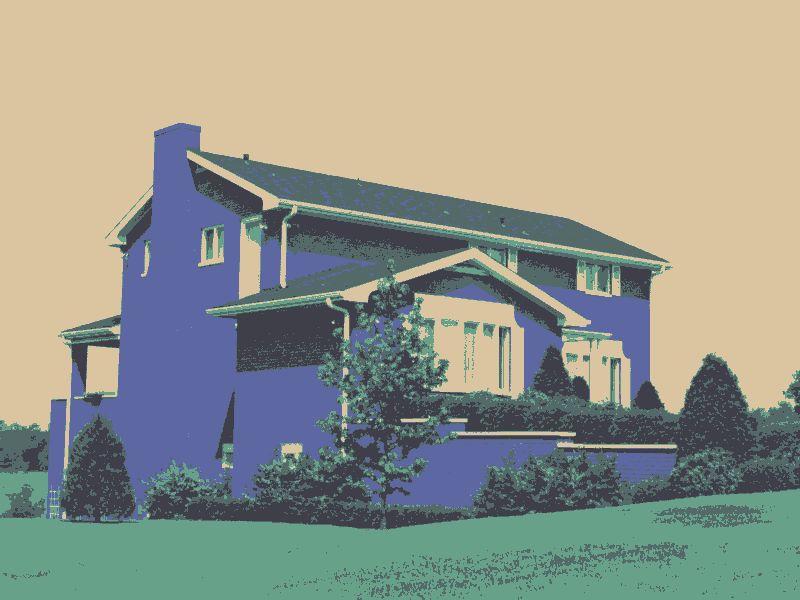

In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# 이미지 불러오기
img = cv2.imread('/content/gdrive/My Drive/ColabIP/images/home3.jpg')

# 이미지를 RGB로 변환
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 이미지를 reshape하여 2D 배열로 변환 (각 픽셀을 하나의 데이터 포인트로 사용)
Z = RGB_img.reshape((-1, 3))
Z = np.float32(Z)

# K-means 클러스터링을 위한 조건 설정
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
K = 5  # 군집의 개수 설정
ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# 클러스터 센터 (중심)을 uint8으로 변환
center = np.uint8(center)
res = center[label.flatten()]

# 결과 이미지로 변환하여 표시
res2 = res.reshape(RGB_img.shape)
cv2_imshow(res2)


2.   엣지검출 및 객체검출

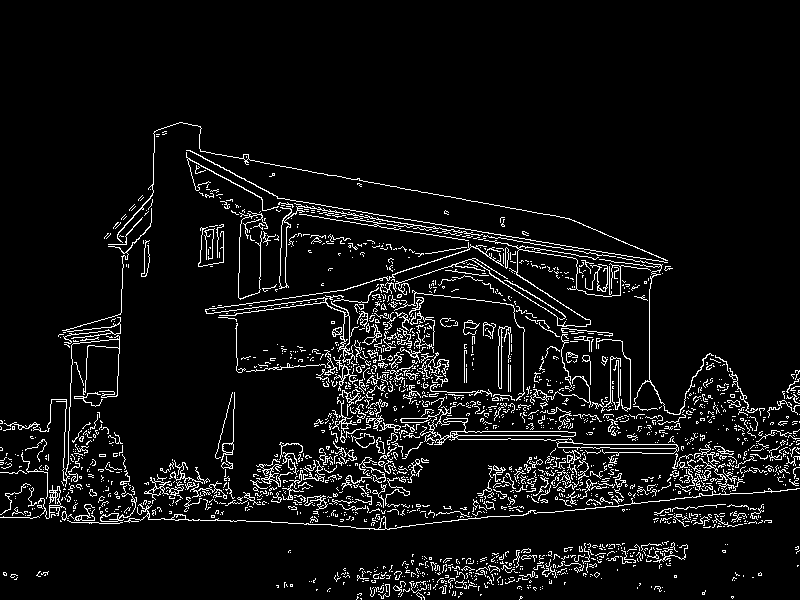

In [5]:
# 그레이스케일 이미지로 변환
gray_img = cv2.cvtColor(res2, cv2.COLOR_RGB2GRAY)

# Canny 엣지 검출
edges = cv2.Canny(gray_img, 100, 200)
cv2_imshow(edges)

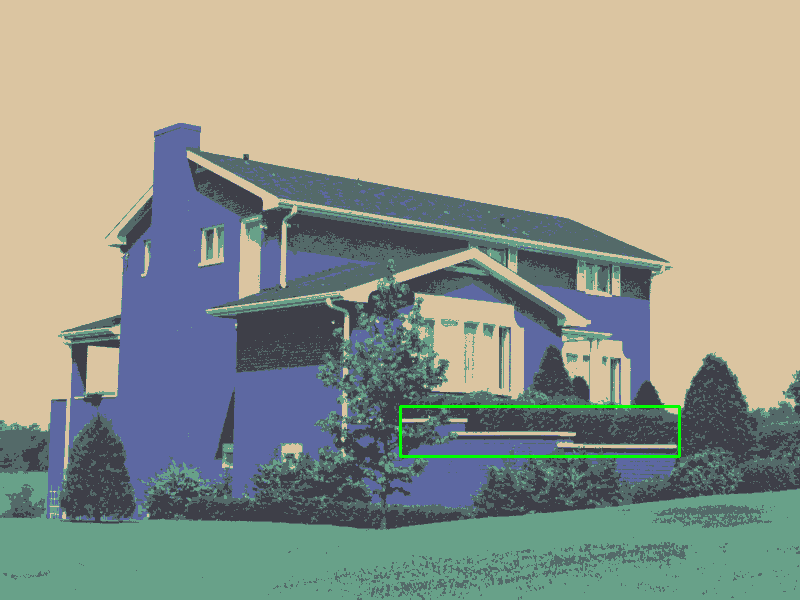

In [6]:
# Canny 엣지 검출 후 컨투어 찾기
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 각 객체에 대해 경계 상자 그리기
for contour in contours:
    if cv2.contourArea(contour) > 500:  # 면적이 500 이상인 객체만 처리
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(res2, (x, y), (x + w, y + h), (0, 255, 0), 2)  # 경계 상자 그리기

cv2_imshow(res2)


3.   객체 특성 분석

Area: 1166.0, Center: (546, 437)


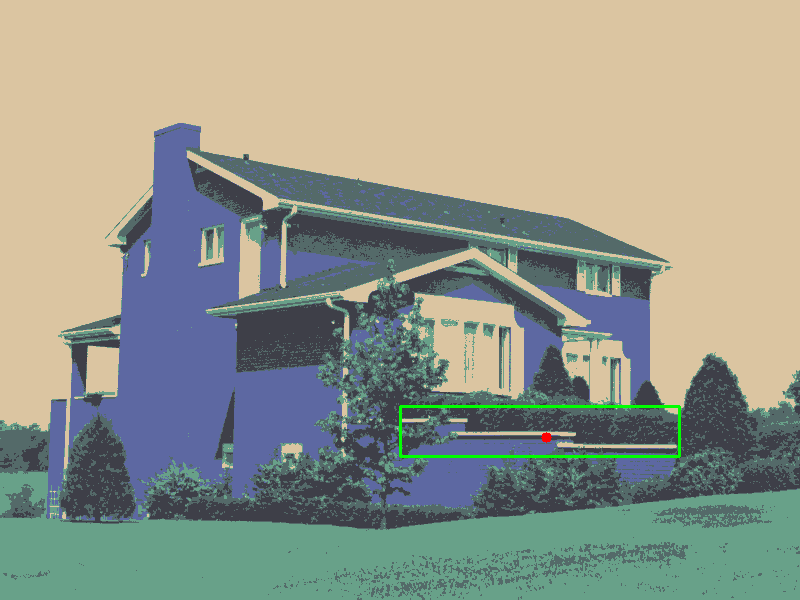

In [7]:
# 객체의 면적과 중심 좌표 계산
for contour in contours:
    if cv2.contourArea(contour) > 500:  # 면적이 500 이상인 객체만 처리
        # 객체 면적
        area = cv2.contourArea(contour)

        # 객체의 중심 좌표
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            cv2.circle(res2, (cX, cY), 5, (0, 0, 255), -1)  # 중심 좌표 표시

        # 객체 면적 출력
        print(f"Area: {area}, Center: ({cX}, {cY})")

cv2_imshow(res2)
